In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner

In [2]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [3]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [4]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [5]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")

In [7]:
fig = gmcmc.RJcorner(data[0],data[1])

Error in callback <function flush_figures at 0x13b603700> (for post_execute):


KeyboardInterrupt: 

In [6]:
recon = [[cheb_fn(np.sum(data[1][x,1:]), data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]


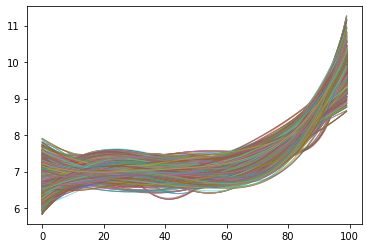

In [11]:
for x in recon:
    plt.plot(x,alpha=.5,linewidth=1)

In [8]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)

print(up.shape)

(100,)


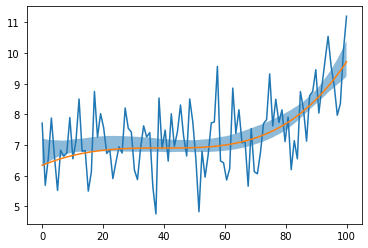

In [21]:
plt.plot(time,true_data)
plt.plot(time,true_clean_data)
plt.fill_between(time,up,down,alpha=.5)

Bayes factor 5/6:  5.026598543380134


(array([0.00000000e+00, 0.00000000e+00, 1.33201332e-04, 9.29007290e-02,
        6.53462335e-01, 1.30000900e-01, 1.98091981e-02, 3.10503105e-03,
        5.88605886e-04]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 <BarContainer object of 9 artists>)

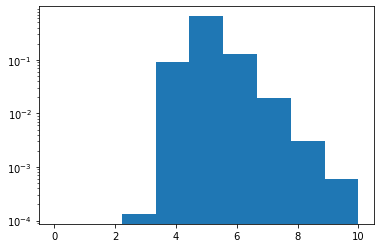

In [22]:
bins = np.linspace(0,len(data[1][0]),len(data[1][0]))
dims = np.sum(data[1],axis=1)
print("Bayes factor 5/6: ",np.sum(dims == 5) / np.sum(dims==6))
plt.hist(dims,bins=bins,log=True,density=True)

(array([   48.,   254.,  1878.,  8852., 20023., 24220., 20618.,  7619.,
         1555.,   212.]),
 array([-0.52674124, -0.40855672, -0.2903722 , -0.17218768, -0.05400316,
         0.06418136,  0.18236588,  0.3005504 ,  0.41873492,  0.53691944,
         0.65510396]),
 <BarContainer object of 10 artists>)

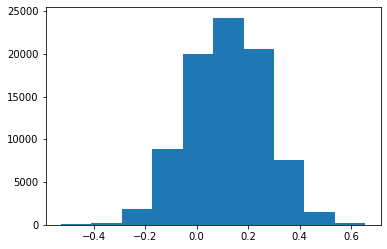

In [15]:
ID = 5
plt.hist(data[0][data[1][:,ID] == 1,ID])

In [16]:
dims = np.sum(data[1],axis=1)